
¡Hola, Oscar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>



# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Introspectiva del Proyecto

La compañía de telecomunicaciones Megaline busca determinar cuál de sus dos tarifas de prepago, Surf o Ultimate, genera más ingresos, con el fin de ajustar su presupuesto de publicidad y optimizar sus estrategias comerciales. Para ello, se analizarán datos de 500 clientes correspondientes al año 2018, incluyendo información personal y actividades de consumo.

Inicialmente, revisaré los datos contenidos en los cinco dataframes entregados, verificando la pertinencia de los formatos (por ejemplo, convertir fechas a formato Datetime o datos a números si fuera necesario). También identificaré y trataré datos ausentes y valores duplicados, asegurando la calidad de la información.

Luego, agruparé los datos de llamadas, mensajes e internet por usuario para fusionarlos en una tabla consolidada, que me permitirá calcular:

Número de llamadas y minutos totales por mes.
Número de mensajes enviados por mes.
Volumen de datos consumidos por mes.

A partir de estos datos, calcularé los ingresos mensuales por usuario, considerando los minutos, mensajes y datos excedentes respecto a los planes, multiplicando por los precios correspondientes y sumando la cuota mensual del plan.

Con estos datos preparados, describiré el comportamiento mensual de los clientes en términos de consumo e ingresos promedio por tipo de plan, utilizando medidas estadísticas como medias, varianzas y desviaciones estándar, además de visualizaciones como histogramas y diagramas de caja.

Finalmente, plantearé dos hipótesis de interés: una sobre si existen diferencias en los ingresos entre las tarifas Surf y Ultimate, y otra sobre si los ingresos varían entre regiones (por ejemplo, Nueva York/Nueva Jersey versus otras áreas). Para ello, aplicaré pruebas t de Student para comparar medias, siempre verificando los supuestos de normalidad y homogeneidad de varianzas, con un nivel de confianza del 95%.

Este análisis me permitirá identificar cuál tarifa es más rentable y comprender mejor el comportamiento de los clientes en diferentes regiones, aportando información valiosa para la toma de decisiones estratégicas de Megaline.



## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt



<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de math para hacer el redondeo con otros métodos

## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")


## Preparar los datos

In [4]:
print(users.info())
users.sample(5, random_state=38)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
446,1446,Pasquale,Ball,52,"Austin-Round Rock-Georgetown, TX MSA",2018-09-10,surf,NaN
147,1147,Duncan,Malone,71,"Urban Honolulu, HI MSA",2018-04-30,surf,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-03-06,ultimate,NaN
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
476,1476,Tammara,Dorsey,24,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-10,ultimate,NaN


In [5]:
users.duplicated().sum()

0

In [6]:
print(calls.info())
calls.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
52288,1187_481,1187,2018-12-12,0.00
30634,1114_568,1114,2018-10-21,1.05
54228,1196_106,1196,2018-07-23,5.67
110372,1389_454,1389,2018-05-12,11.49
109600,1386_60,1386,2018-11-24,0.00


In [7]:
print(internet.info())
internet.sample(5, random_state=41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
19221,1086_10,1086,2018-12-31,0.00
3819,1022_230,1022,2018-08-20,478.28
35462,1160_166,1160,2018-09-30,0.00
55649,1252_7,1252,2018-11-23,4.99
34975,1157_62,1157,2018-09-28,584.52


In [8]:
print(messages.info())
messages.sample(5, random_state=40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
3121,1035_75,1035,2018-12-28
24581,1145_436,1145,2018-09-22
72223,1468_41,1468,2018-09-12
26930,1164_180,1164,2018-11-08
12201,1080_204,1080,2018-08-19


In [9]:
print(plans.info())
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
plans.duplicated().sum()

0

## Tarifas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [12]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
plans.duplicated().sum()

0

OBSERVACIONES GENERALES DE LOS DATOS DEL DATAFRAME "PLANS"

La tabla "plans" muestra información específica sobre lo que contiene el plan asociado tanto a la tarifa Surf (fila 0), y la tarifa Ultimate (fila 1). La información de la tarifa se visualiza en cada columna, según el tipo de dato. 

Analizando los tipos de datos, nos encontramos con lo siguiente. El nombre del plan es de tipo "objeto". Los mensajes, datos incluidos en megabytes, minutos, pagos mensuales en dólares y precio por gygabyte todos correctamente presentados en "int64". Finalmente, los precios  en dólares por exceder la tarifa de prepago, tanto en minutos como por mensaje, están presentados correctamente en decimales o "float64". Como es una tabla informativa, y solo dos filas, no hay datos ausentes, ni duplicados.

El problema que presenta esta tabla es que Megaline redondea el consumo de datos de megabytes a gigabytes, y por lo tanto, se tendría que crear una columna con la conversión a gigabytes, y posteriormente, pasar la columna a tipo entero "int64".

## Corregir datos

In [14]:
plans["gb_per_month_included"] = plans["mb_per_month_included"] / 1024
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Enriquecer los datos

In [15]:
plans["gb_per_month_included"] = plans["gb_per_month_included"].astype(int)
print(plans.info())
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 272.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [16]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
# Imprime una muestra de datos para usuarios
users.sample(5, random_state=38)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
446,1446,Pasquale,Ball,52,"Austin-Round Rock-Georgetown, TX MSA",2018-09-10,surf,NaN
147,1147,Duncan,Malone,71,"Urban Honolulu, HI MSA",2018-04-30,surf,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-03-06,ultimate,NaN
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
476,1476,Tammara,Dorsey,24,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-10,ultimate,NaN


In [18]:
users.duplicated().sum()

0

OBSERVACIONES GENERALES DE LOS DATOS DEL DATAFRAME "USERS"

En el Dataframe "users" observo que existen datos ausentes solamente en la columna "churn_date", sin embargo, eso significa que los usuarios siguen usando los servicios al momento que se extrajo la información, de acuerdo a lo informado por la empresa previamente. Ante esta situación, procederé a mantener estos valores NaN que me indicarán que los clientes siguen activos.

Cambiaré las columnas "reg-date" y "churn_date" de tipo de datos "object" a "datetime", así como la columna "user_id" de "int_64" a "object".

No existen datos duplicados.

Tengo que hacer un cambio en el nombre de la columna "plan" a "plan_name". Este paso será importante al realizar una fusión posterior, ya que la columna similar del dataframe "plans" tiene el nombre de "plan_name".

### Corregir los datos

In [19]:
users["reg_date"] = pd.to_datetime(users["reg_date"])
users["churn_date"] = pd.to_datetime(users["churn_date"])
users["user_id"] = users["user_id"].astype(str)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Enriquecer los datos

In [20]:
# Camnbiar el nombre de la columna "plan" a "plan_name" para realizar una fusión posterior
users = users.rename(columns={"plan" : "plan_name"})


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


## Llamadas

In [22]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Imprime una muestra de datos para las llamadas
calls.sample(5, random_state=42)


,id,user_id,call_date,duration
52288,1187_481,1187,2018-12-12,0.00
30634,1114_568,1114,2018-10-21,1.05
54228,1196_106,1196,2018-07-23,5.67
110372,1389_454,1389,2018-05-12,11.49
109600,1386_60,1386,2018-11-24,0.00


In [24]:
calls.duplicated().sum()

0

OBSERVACIONES GENERALES DE LOS DATOS DEL DATAFRAME "CALLS"

El Dataframe "calls", no presenta valores ausentes ni duplicados. 

Cambiaré la columna "call_date" de "object" a "Datetime", y la columna "user_id" de "int_64" a "object".

Finalmente, necesitaré crear una columna nueva que se filtre por meses, y crear otra columna que redondee los segundos a minutos y conventir los datos de la columna en tipo "entero". Esto es necesario, porque Megaline tiene la política de redondear cada llamada de segundos a minutos, aunque solo dure 1 segundo.

Me llama la atención que existen llamadas con duraciones de minutos de 0, lo cual puede evidenciar o problemas para concretar la llamadas y/o que el usuario haya colgado de inmediato, esto es un tema que Megaline tendrá que revisar.



### Corregir los datos

In [25]:
calls["call_date"] = pd.to_datetime(calls["call_date"])
calls["user_id"] = calls["user_id"].astype(str)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

In [26]:
# Crear una columna nueva que muestre la información de los "meses".
calls["months"] = calls["call_date"].dt.month

# Crear una columna nueva que redondee los segundos a minutos.
calls["calls_rounded_to_minutes"] = np.ceil(calls["duration"]) 

# Se convierten la columna "calls_rounded_to_minutes" en tipo "entero".
calls["calls_rounded_to_minutes"] = calls["calls_rounded_to_minutes"].astype(int)



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

## Mensajes

In [27]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Imprime una muestra de datos para los mensajes
messages.sample(5, random_state=40)


,id,user_id,message_date
3121,1035_75,1035,2018-12-28
24581,1145_436,1145,2018-09-22
72223,1468_41,1468,2018-09-12
26930,1164_180,1164,2018-11-08
12201,1080_204,1080,2018-08-19


In [29]:
messages.duplicated().sum()

0

OBSERVACIONES GENERALES DE LOS DATOS DEL DATAFRAME "MESSAGES"

En el Dataframe "messages" no hay valores ausentes ni duplicados.

Se convertirá la columna "user_id" de tipo "int64" a "object" y la columna "message_date" de "object" a "datetime".

Finalmente, agregaré una columna nueva donde se visualize la información de los meses.

### Corregir los datos

In [30]:
messages["user_id"] = messages["user_id"].astype(str)
messages["message_date"] = pd.to_datetime(messages["message_date"])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

In [31]:
# Crear una columna nueva que muestre la información de los "meses"
messages["months"] = messages["message_date"].dt.month


## Internet

In [32]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(5, random_state=41)


,id,user_id,session_date,mb_used
19221,1086_10,1086,2018-12-31,0.00
3819,1022_230,1022,2018-08-20,478.28
35462,1160_166,1160,2018-09-30,0.00
55649,1252_7,1252,2018-11-23,4.99
34975,1157_62,1157,2018-09-28,584.52


In [34]:
internet.duplicated().sum()

0

OBSERVACIONES GENERALES DE LOS DATOS DEL DATAFRAME "INTERNET"

El Dataframe "internet", no presenta valores ausentes ni duplicados. 

Cambiaré la columna "session_date" de "object" a "Datetime", y la columna "user_id" de "int_64" a "object".

Finalmente, agregaré una columna nueva donde se visualize la información de los meses, y otra columna, para obtener la información por "gb", dividiendo la columna "mb_used" entre 1,024(MB). Esto es necesario para poder realizar el redondeo mensual del tráfico web por usuario, y así poder realizar el cálculo del consumo de datos excedentes al mes.


### Corregir los datos

In [35]:
internet["session_date"] = pd.to_datetime(internet["session_date"])
internet["user_id"] = internet["user_id"].astype(str)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

In [36]:
# Crear una columna nueva que muestre la información de los "meses"
internet["months"] = internet["session_date"].dt.month

# Se crea una columna con el dato de los "gb" usados, dividiendo la columna mb_used / 1024(MB)
internet["gb_used"] = internet["mb_used"] / 1024



## Estudiar las condiciones de las tarifas

# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
Surf

Pago mensual: $20.

500 minutos al mes, 50 SMS y 15 GB de datos.

Si se exceden los límites del paquete:

1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.

Ultimate

Pago mensual: $70.

3000 minutos al mes, 1000 SMS y 30 GB de datos.

Si se exceden los límites del paquete:

1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.



In [37]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario




In [38]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_number = calls.groupby(["user_id", "months"])["id"].count().reset_index().rename(columns={"id" : "calls_number"})
calls_number.head()

,user_id,months,calls_number
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [39]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_minutes_per_user = calls.groupby(["user_id", "months"])["calls_rounded_to_minutes"].sum().reset_index().rename(columns={"calls_rounded_to_minutes" : "minutes_used_per_user_monthly"})
calls_minutes_per_user.head()


,user_id,months,minutes_used_per_user_monthly
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [40]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_sent_per_user = messages.groupby(["user_id", "months"])["id"].count().reset_index().rename(columns={"id" : "messages_number_sent_monthly"})
messages_sent_per_user.head()


,user_id,months,messages_number_sent_monthly
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [41]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_minutes_per_user = internet.groupby(["user_id", "months"])["gb_used"].sum().reset_index().rename(columns={"gb_used" : "gb_used_per_user_monthly"})
# Se realiza el redondeo de "gb"
internet_minutes_per_user["gb_used_per_user_monthly"] = np.ceil(internet_minutes_per_user["gb_used_per_user_monthly"])
# Se convierten los datos a tipo "entero"
internet_minutes_per_user["gb_used_per_user_monthly"] = internet_minutes_per_user["gb_used_per_user_monthly"].astype(int)
# Se renombra la columna "gb_used_per_user_monthly" a "rounded_gb_used_per_user_monthly"
internet_minutes_per_user.columns = ["user_id", "months", "rounded_gb_used_per_user_monthly"]
# Se imprimen las primeras 5 filas del Database "internet_minutes_per_user"
internet_minutes_per_user.head()


,user_id,months,rounded_gb_used_per_user_monthly
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


In [42]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Utilizo el parámetro "outer" por que no quiero que se pierda información de consumos realizados
# por algunos usuarios que no lo hicieron en todos las variables, esto es, que no consumieron las
# 4 variables, de número de llamadas, minutos de llamadas, mensajes enviados y uso de internet.
fusion_one = calls_number.merge(calls_minutes_per_user, on=['user_id', 'months'], how='outer') \
                  .merge(messages_sent_per_user, on=['user_id', 'months'], how='outer') \
                  .merge(internet_minutes_per_user, on=['user_id', 'months'], how='outer')
fusion_one.head()

,user_id,months,calls_number,minutes_used_per_user_monthly,messages_number_sent_monthly,rounded_gb_used_per_user_monthly
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


In [43]:
fusion_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2293 non-null   object 
 1   months                            2293 non-null   int64  
 2   calls_number                      2258 non-null   float64
 3   minutes_used_per_user_monthly     2258 non-null   float64
 4   messages_number_sent_monthly      1806 non-null   float64
 5   rounded_gb_used_per_user_monthly  2277 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 125.4+ KB


In [44]:
# Relleno los NaNs con cero, ya que los valores ausentes en cada fila representan "user_id" sin
# consumo en cada columna, ya sea, por llamada, minutos, mensajes o uso de internet
fusion_one.fillna({
    'calls_number': 0,
    'minutes_used_per_user_monthly': 0,
    'messages_number_sent_monthly': 0,
    'rounded_gb_used_per_user_monthly': 0
}, inplace=True)


In [45]:
fusion_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2293 non-null   object 
 1   months                            2293 non-null   int64  
 2   calls_number                      2293 non-null   float64
 3   minutes_used_per_user_monthly     2293 non-null   float64
 4   messages_number_sent_monthly      2293 non-null   float64
 5   rounded_gb_used_per_user_monthly  2293 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 125.4+ KB


In [46]:
# Primer paso, realizar la fusión de los dataframes "plans" con "users", con on en "plan_name"
# previamente se realizó el cambio de nombre a plan_name en el dataframe "users" original
# Se traen solo las columnas "user_id", "plan_name" y "city" del dataframe "users"
fusion_two = plans.merge(users[["user_id", "plan_name", "city"]], on="plan_name", how="inner")
fusion_two.info()    



<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      500 non-null    int64  
 1   mb_per_month_included  500 non-null    int64  
 2   minutes_included       500 non-null    int64  
 3   usd_monthly_pay        500 non-null    int64  
 4   usd_per_gb             500 non-null    int64  
 5   usd_per_message        500 non-null    float64
 6   usd_per_minute         500 non-null    float64
 7   plan_name              500 non-null    object 
 8   gb_per_month_included  500 non-null    int64  
 9   user_id                500 non-null    object 
 10  city                   500 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 46.9+ KB


In [47]:
# Añade la información de la tarifa
# Se realiza la fusión final
final_fusion = fusion_one.merge(fusion_two, on="user_id", how="left")
final_fusion.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2293 non-null   object 
 1   months                            2293 non-null   int64  
 2   calls_number                      2293 non-null   float64
 3   minutes_used_per_user_monthly     2293 non-null   float64
 4   messages_number_sent_monthly      2293 non-null   float64
 5   rounded_gb_used_per_user_monthly  2293 non-null   float64
 6   messages_included                 2293 non-null   int64  
 7   mb_per_month_included             2293 non-null   int64  
 8   minutes_included                  2293 non-null   int64  
 9   usd_monthly_pay                   2293 non-null   int64  
 10  usd_per_gb                        2293 non-null   int64  
 11  usd_per_message                   2293 non-null   float64
 12  usd_pe

In [48]:
# Convertir las columnas con índices del 2 al 5 a "int"
# Lista de nombres de las columnas por índice
columnas_a_convertir = final_fusion.columns[2:6]
# Convertir esas columnas a int
final_fusion[columnas_a_convertir] = final_fusion[columnas_a_convertir].astype(int)
# Imprimir los datos generales del dataframe para comprobar los cambios
final_fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2293 non-null   object 
 1   months                            2293 non-null   int64  
 2   calls_number                      2293 non-null   int64  
 3   minutes_used_per_user_monthly     2293 non-null   int64  
 4   messages_number_sent_monthly      2293 non-null   int64  
 5   rounded_gb_used_per_user_monthly  2293 non-null   int64  
 6   messages_included                 2293 non-null   int64  
 7   mb_per_month_included             2293 non-null   int64  
 8   minutes_included                  2293 non-null   int64  
 9   usd_monthly_pay                   2293 non-null   int64  
 10  usd_per_gb                        2293 non-null   int64  
 11  usd_per_message                   2293 non-null   float64
 12  usd_pe

In [49]:
# Imprimir las primeras filas del dataframe "final_fusion" para ver los detalles generales de
# los datos en las columnas, para preparar los siguientes pasos.
final_fusion.head(5)

,user_id,months,calls_number,minutes_used_per_user_monthly,messages_number_sent_monthly,rounded_gb_used_per_user_monthly,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,city
0,1000,12,16,124,11,2,1000,30720,3000,70,7,0.01,0.01,ultimate,30,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,182,30,7,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,315,44,14,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,393,53,22,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,426,36,19,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA"


In [50]:
# Calcula el ingreso mensual para cada usuario
# Crear nuevas columnas para los excesos
final_fusion['plus_minutes'] = final_fusion['minutes_used_per_user_monthly'] - final_fusion['minutes_included']
final_fusion['plus_messages'] = final_fusion['messages_number_sent_monthly'] - final_fusion['messages_included']
final_fusion['plus_data_gb'] = final_fusion['rounded_gb_used_per_user_monthly'] - final_fusion['gb_per_month_included']
final_fusion.head()



,user_id,months,calls_number,minutes_used_per_user_monthly,messages_number_sent_monthly,rounded_gb_used_per_user_monthly,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,city,plus_minutes,plus_messages,plus_data_gb
0,1000,12,16,124,11,2,1000,30720,3000,70,7,0.01,0.01,ultimate,30,"Atlanta-Sandy Springs-Roswell, GA MSA",-2876,-989,-28
1,1001,8,27,182,30,7,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",-318,-20,-8
2,1001,9,49,315,44,14,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",-185,-6,-1
3,1001,10,65,393,53,22,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",-107,3,7
4,1001,11,64,426,36,19,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",-74,-14,4


In [51]:
# Reemplazar valores negativos por cero (si no hay exceso)
final_fusion['plus_minutes'] = final_fusion['plus_minutes'].clip(lower=0)
final_fusion['plus_messages'] = final_fusion['plus_messages'].clip(lower=0)
final_fusion['plus_data_gb'] = final_fusion['plus_data_gb'].clip(lower=0)
final_fusion.head()


,user_id,months,calls_number,minutes_used_per_user_monthly,messages_number_sent_monthly,rounded_gb_used_per_user_monthly,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,city,plus_minutes,plus_messages,plus_data_gb
0,1000,12,16,124,11,2,1000,30720,3000,70,7,0.01,0.01,ultimate,30,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0,0
1,1001,8,27,182,30,7,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,0
2,1001,9,49,315,44,14,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,0
3,1001,10,65,393,53,22,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,3,7
4,1001,11,64,426,36,19,50,15360,500,20,10,0.03,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,4


In [52]:
# Nuevas columnas con los costos adicionales, resultado de la multiplicación
final_fusion['extra_cost_calls'] = final_fusion['plus_minutes'] * final_fusion['usd_per_minute']
final_fusion['extra_cost_messages'] = final_fusion['plus_messages'] * final_fusion['usd_per_message']
final_fusion['extra_cost_data'] = final_fusion['plus_data_gb'] * final_fusion['usd_per_gb']
final_fusion.head()

,user_id,months,calls_number,minutes_used_per_user_monthly,messages_number_sent_monthly,rounded_gb_used_per_user_monthly,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_minute,plan_name,gb_per_month_included,city,plus_minutes,plus_messages,plus_data_gb,extra_cost_calls,extra_cost_messages,extra_cost_data
0,1000,12,16,124,11,2,1000,30720,3000,70,...,0.01,ultimate,30,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0,0,0.0,0.00,0
1,1001,8,27,182,30,7,50,15360,500,20,...,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,0,0.0,0.00,0
2,1001,9,49,315,44,14,50,15360,500,20,...,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,0,0.0,0.00,0
3,1001,10,65,393,53,22,50,15360,500,20,...,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,3,7,0.0,0.09,70
4,1001,11,64,426,36,19,50,15360,500,20,...,0.03,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,4,0.0,0.00,40


In [53]:
# Calcular ingreso mensual total por usuario
final_fusion['users_monthly_earnings'] = (
    final_fusion['usd_monthly_pay']
    + final_fusion['extra_cost_calls']
    + final_fusion['extra_cost_messages']
    + final_fusion['extra_cost_data']
)
final_fusion.head()


,user_id,months,calls_number,minutes_used_per_user_monthly,messages_number_sent_monthly,rounded_gb_used_per_user_monthly,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,plan_name,gb_per_month_included,city,plus_minutes,plus_messages,plus_data_gb,extra_cost_calls,extra_cost_messages,extra_cost_data,users_monthly_earnings
0,1000,12,16,124,11,2,1000,30720,3000,70,...,ultimate,30,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0,0,0.0,0.00,0,70.00
1,1001,8,27,182,30,7,50,15360,500,20,...,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,0,0.0,0.00,0,20.00
2,1001,9,49,315,44,14,50,15360,500,20,...,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,0,0.0,0.00,0,20.00
3,1001,10,65,393,53,22,50,15360,500,20,...,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,3,7,0.0,0.09,70,90.09
4,1001,11,64,426,36,19,50,15360,500,20,...,surf,15,"Seattle-Tacoma-Bellevue, WA MSA",0,0,4,0.0,0.00,40,60.00


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div style="background-color: #ADD8E6; padding: 10px; border-radius: 5px;">

**Respuesta del estudiante.**

Hola Tonatiuh, agradezco tus comentarios y recomendaciones generales a lo largo del proyecto, que me ayudarán en futuros codificaciones y trabajos.

Con respecto a este comentario, puedes observar que en la sección 1.10.2 llamada: "Enriquecer los datos", en la sección de líneas con número 36, en la segunda línea de código, en el dataframe de “internet”, realice la creación de una columna nueva llamada “gb_used” que resulto de dividir la columna “mb_used” entre 1,024, lo que es equivalente a 1 GB. 

Despúes en la sección 2.1 llamada: “agregar datos por usuario”, en la sección de línea 41, verás que en 4 códigos, agrupe por "user_id" y “months” con la columna “gb_used” para obtener los consumos de internet por usuario y mes, inmediatamente renombre la columna "gb_used" por “gb_used_per_user_monthly”. En la segunda línea, redonde los “GB” y en la tercera línea convertí los datos de esta columna a tipo entero. En la cuarta línea cambie el nombre de la columna a “rounded” para advertir que fuera notorio que esta columna ya llevaba el redondeo, quedando el nombre completo de la columna como “rounded_gb_used_per_user_monthly”. Como se puede ver en la última línea al llamar al método “head”, la columna “rounded_gb_used_per_user_monthly, ya tiene el redondeo del consumo mensual en GB por usuario.

En las líneas de la sección 50, en la tercer fila de código, esta columna la resté a la columna gb_per_month_included” del dataframe “plans” (en la línea 14, a su vez, ya habia ejecutado la conversión de "gb" a "mb" de las tarifas bases que ofrecen los planes). 

En síntesis, los datos de consumo del internet por usuario al mes ya están redondeados en la columnas “rounded_gb_used_per_user_monthly”. Saludos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Redondeas de manera perfecta la duración de las llamadas y los gb

## Estudia el comportamiento de usuario

### Llamadas

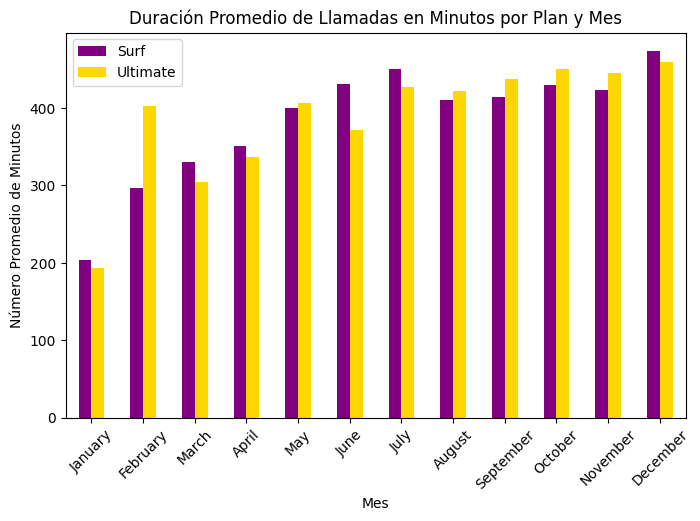

In [54]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la  información del promedio de duración de llamadas por plan
mean_call_surf = plan_surf.groupby("months")["minutes_used_per_user_monthly"].mean() 
mean_call_ultimate = plan_ultimate.groupby("months")["minutes_used_per_user_monthly"].mean() 

# Creación de un nuevo Dataframe que una la agrupación del cálculo del promedio de duración de
# llamadas por plan
compared_mean_calls = pd.DataFrame({
    "Surf" : mean_call_surf,
    "Ultimate" : mean_call_ultimate
})
compared_mean_calls = compared_mean_calls.reset_index()
# Reenombrar los datos de los meses de números a nombres.
compared_mean_calls["months"] = compared_mean_calls["months"].replace({1 : "January", 
                                                               2 : "February", 
                                                               3 : "March", 
                                                               4 : "April",
                                                               5 : "May",
                                                               6 : "June",
                                                               7 : "July",
                                                               8 : "August",
                                                               9 : "September",
                                                               10 : "October",
                                                               11 : "November",
                                                               12 : "December"})
# Código del gráfico de barras
compared_mean_calls.plot(kind="bar",
            x="months",
            title="Duración Promedio de Llamadas en Minutos por Plan y Mes",
            xlabel="Mes",
            ylabel="Número Promedio de Minutos",
            color=["purple","gold"],
            rot=45,
            figsize=[8,5])

plt.legend(["Surf", "Ultimate"])
plt.show()

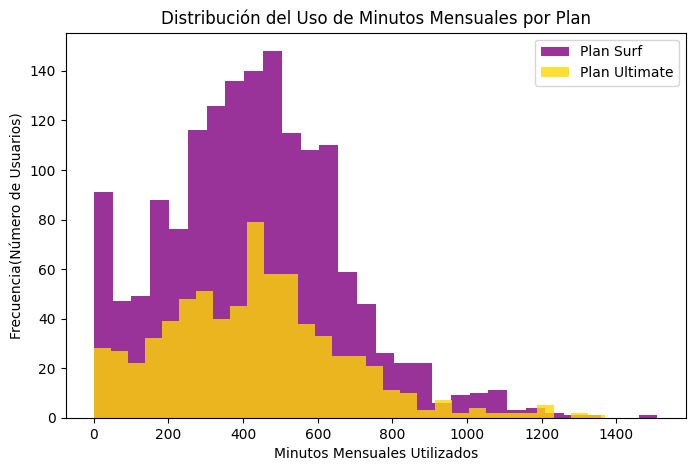

In [55]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Código del histograma
plt.figure(figsize=[8,5])

plan_surf["minutes_used_per_user_monthly"].plot(kind="hist",
                                                color="purple",                                        
                                                alpha=0.8,
                                                bins=30)

plan_ultimate["minutes_used_per_user_monthly"].plot(kind="hist",
                                                    alpha=0.8,
                                                    color="gold",
                                                    bins=30)
plt.xlabel("Minutos Mensuales Utilizados")
plt.ylabel("Frecuencia(Número de Usuarios)")
plt.title("Distribución del Uso de Minutos Mensuales por Plan")
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.show()

In [56]:
# Calcula la media y la varianza de la duración mensual de llamadas por plan
# También incluí el cálculo de la desviación estándar y la mediana.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información de los minutos usados mensualmente
call_surf = plan_surf["minutes_used_per_user_monthly"]
call_ultimate = plan_ultimate["minutes_used_per_user_monthly"]

# Obtener los cálculos del promedio de llamadas mensuales, varianza, desviación estándar y mediana
# del plan Surf
mean_call_surf = call_surf.mean()
var_call_surf = np.var(call_surf)
sigma_call_surf = np.std(call_surf)
mediam_call_surf = call_surf.median()

# Obtener los cálculos del promedio de llamadas mensuales, varianza, desviación estándar y mediana
# del plan Ultimate
mean_call_ultimate = call_ultimate.mean()
var_call_ultimate = np.var(call_ultimate)
sigma_call_ultimate = np.std(call_ultimate)
mediam_call_ultimate = call_ultimate.median()

# Imprimir los resultados de las medidas estadísticas
print("Plan Surf")
print("La media de la duración de llamadas del plan surf es:", mean_call_surf)
print("La varianza de la duración de llamadas del plan surf es:",var_call_surf)
print("La desviación estándar de la duración de llamadas del plan surf es:",sigma_call_surf)
print("La mediana de la duración de llamadas del plan surf es:",mediam_call_surf)
print()
print("Plan Ultimate")
print("La media de la duración de llamadas del plan ultimate es:",mean_call_ultimate)
print("La varianza de la duracion de llamadas del plan ultimate es:",var_call_ultimate)
print("La desviación estándar de la duración de llamadas del plan ultimate es:",sigma_call_ultimate)
print("La mediana de la duración de llamadas del plan ultimate es:",mediam_call_ultimate)


Plan Surf
La media de la duración de llamadas del plan surf es: 428.7495232040687
La varianza de la duración de llamadas del plan surf es: 54933.334591317485
La desviación estándar de la duración de llamadas del plan surf es: 234.37861376695076
La mediana de la duración de llamadas del plan surf es: 425.0

Plan Ultimate
La media de la duración de llamadas del plan ultimate es: 430.45
La varianza de la duracion de llamadas del plan ultimate es: 57764.12527777777
La desviación estándar de la duración de llamadas del plan ultimate es: 240.34168443650753
La mediana de la duración de llamadas del plan ultimate es: 424.0


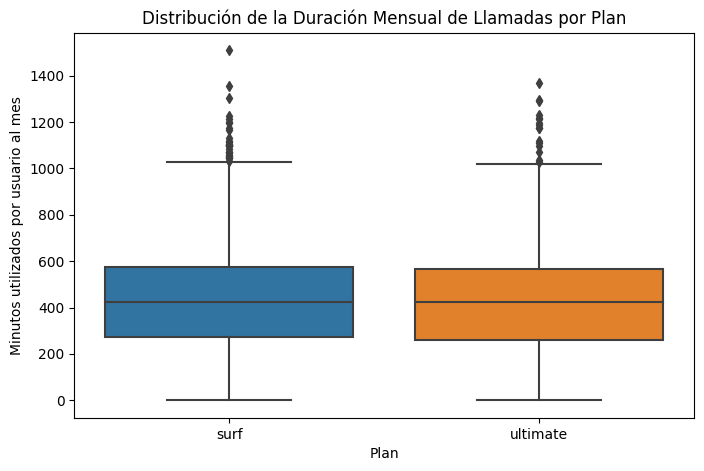

In [57]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas por
# plan.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información de los minutos usados mensualmente
call_surf = plan_surf["minutes_used_per_user_monthly"]
call_ultimate = plan_ultimate["minutes_used_per_user_monthly"]

# Datos
data = {
    'Duración': pd.concat([call_surf, call_ultimate], ignore_index=True),
    'Plan': ['surf'] * len(call_surf) + ['ultimate'] * len(call_ultimate)
}
# Nuevo Dataframe
compared_plans = pd.DataFrame(data)

# Crear Gráfico 
plt.figure(figsize=[8,5])
sns.boxplot(x="Plan", y="Duración", data=compared_plans)
plt.title("Distribución de la Duración Mensual de Llamadas por Plan")
plt.xlabel("Plan")
plt.ylabel("Minutos utilizados por usuario al mes")

plt.show()



CONCLUSIONES SOBRE LLAMADAS

No existe un claro patrón de diferencia entre los dos planes, cuando se analiza la duración promedio de llamadas en cada mes. Los patrones son similares, existiendo solo un pico considerable en el mes de febrero con el plan Ultimate comparado al plan Surf, pero no represento el tope del año que, para los dos planes, ocurrió en el mes de diciembre. 

Se puede apreciar que la mayor frecuencia del número de minutos mensuales utilizados en los dos planes oscila entre 450 a 600 minutos. La mayor parte de los clientes que usan el plan Surf están agrupados en torno a los 600 minutos, lo cual indica que tendrían alrededor de un excedente de 100 minutos, ya que rebasan los 500 minutos que ofrece el plan. El plan Ultimate tiene un rango más bajo de uso minutos con menos clientes, y los usuarios no utilizan la totalidad de minutos ofrecidos en el plan base. Entonces podemos decir que un mayor número de clientes utilizan el plan Surf, y por ende, es más popular. 

Los promedios, varianzas y desviaciones estándar de llamada mensuales de ambos planes son muy similares. Los clientes utilizan en promedio, la misma cantidad de minutos mensuales. Al tener varianzas y desviaciones estándar similares, indican que la variabilidad en el uso de minutos entre los clientes de cada plan es equiparable, si bien el plan Ultimate tiene una dispersión ligeramente mayor. 

Todo esto se confirma con figuras muy similares observadas en el diagrama de caja y bigotes, esto es, medianas similares alrededor de los 400 minutos en ambos planes; ajas similares, con rangos de Q1 a Q3, y bigotes casi idénticos. Finalmente, se puede observar en el caso del plan Surf, se observan unos pocos valores más dispersos (3 en total), pero los demás valores atípicos se concentran más, comparativamente con el plan Ultimate, donde sus valores tienden a dispersarse ligeramente más.



### Mensajes

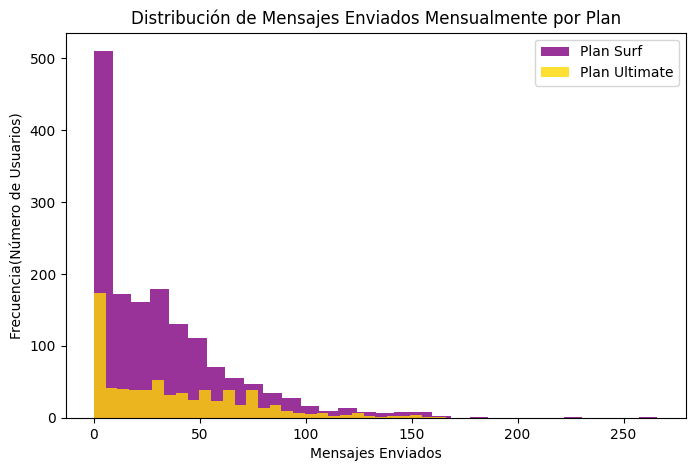

In [58]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Código del histograma
plt.figure(figsize=[8,5])

plan_surf["messages_number_sent_monthly"].plot(kind="hist",
                                                color="purple",                                        
                                                alpha=0.8,
                                                bins=30)

plan_ultimate["messages_number_sent_monthly"].plot(kind="hist",
                                                    alpha=0.8,
                                                    color="gold",
                                                    bins=30)
plt.xlabel("Mensajes Enviados")
plt.ylabel("Frecuencia(Número de Usuarios)")
plt.title("Distribución de Mensajes Enviados Mensualmente por Plan")
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.show()


In [59]:
# Calcula la media y la varianza de los mensajes enviados mensualmente por plan.
# También incluí el cálculo de la desviación estándar y la mediana

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información de los mensajes enviados mensualmente por plan
messages_surf = plan_surf["messages_number_sent_monthly"]
messages_ultimate = plan_ultimate["messages_number_sent_monthly"]

# Obtener los cálculos del promedio de mensajes enviados mensualmente, varianza, desviación 
# estándar y mediana del plan Surf
mean_messages_surf = messages_surf.mean()
var_messages_surf = np.var(messages_surf)
sigma_messages_surf = np.std(messages_surf)
mediam_messages_surf = messages_surf.median()

# Obtener los cálculos del promedio de mensajes enviados mensualmente, varianza, desviación 
# estándar y mediana del plan Ultimate
mean_messages_ultimate = messages_ultimate.mean()
var_messages_ultimate = np.var(messages_ultimate)
sigma_messages_ultimate = np.std(messages_ultimate)
mediam_messages_ultimate = messages_ultimate.median()

# Imprimir los resultados de las medidas estadísticas
print("Plan Surf")
print("La media de mensajes enviados mensualmente del plan surf es:", mean_call_surf)
print("La varianza de mensajes enviados mensualmente del plan surf es:",var_call_surf)
print("La desviación estándar de mensajes enviados mensualmente del plan surf es:",sigma_call_surf)
print("La mediana de mensajes enviados mensualmente del plan surf es:",mediam_messages_surf)
print()
print("Plan Ultimate")
print("La media de mensajes enviados mensualmente del plan ultimate es:",mean_call_ultimate)
print("La varianza de mensajes enviados mensualmente del plan ultimate es:",var_call_ultimate)
print("La desviación estándar de mensajes enviados mensualmente del plan ultimate es:",sigma_call_ultimate)
print("La mediana de mensajes enviados mensualmente del plan ultimate es:",mediam_messages_ultimate)




Plan Surf
La media de mensajes enviados mensualmente del plan surf es: 428.7495232040687
La varianza de mensajes enviados mensualmente del plan surf es: 54933.334591317485
La desviación estándar de mensajes enviados mensualmente del plan surf es: 234.37861376695076
La mediana de mensajes enviados mensualmente del plan surf es: 24.0

Plan Ultimate
La media de mensajes enviados mensualmente del plan ultimate es: 430.45
La varianza de mensajes enviados mensualmente del plan ultimate es: 57764.12527777777
La desviación estándar de mensajes enviados mensualmente del plan ultimate es: 240.34168443650753
La mediana de mensajes enviados mensualmente del plan ultimate es: 30.0


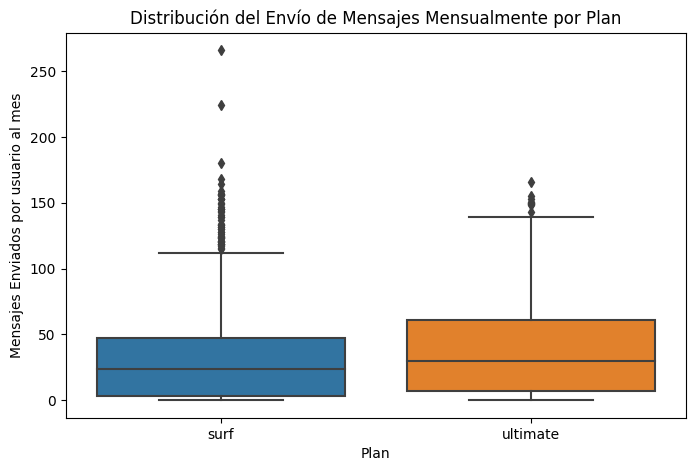

In [60]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente
# por plan.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información de los mensajes enviados mensualmente por plan
messages_surf = plan_surf["messages_number_sent_monthly"]
messages_ultimate = plan_ultimate["messages_number_sent_monthly"]

# Datos
data_messages = {
    'Mensajes': pd.concat([messages_surf, messages_ultimate], ignore_index=True),
    'Plan': ['surf'] * len(messages_surf) + ['ultimate'] * len(messages_ultimate)
}
# Nuevo Dataframe
compared_plan_messages = pd.DataFrame(data_messages)

# Crear Gráfico
plt.figure(figsize=[8,5])
sns.boxplot(x="Plan", y="Mensajes", data=compared_plan_messages)
plt.title("Distribución del Envío de Mensajes Mensualmente por Plan")
plt.xlabel("Plan")
plt.ylabel("Mensajes Enviados por usuario al mes")

plt.show()

CONCLUSIONES SOBRE MENSAJES ENVIADOS MENSUALMENTE

Analizando lo mostrado en el histograma, se puede notar que un mayor número de usuarios no envían mensajes, ya que una mayor cantidad de clientes se concentran en torno al valor cero, y en mayor proporción lo hacen clientes con planes Surf. En ese punto, los usuarios con planes Surf triplican a los usuarios con planes Ultimate en el envío de mensajes. Desde ese punto en adelante, se observa que el número de usuarios que envían un mayor número de mensajes tiende a disminuir fuertemente. Se visualiza que casi no hay usuarios que envían mas de 100 mensajes al mes. Puedo deducir viendo este gráfico que los usuarios de ambos planes no hacen mucho uso de la opción de mensajería, posiblemente por que utilizan más servicios de llamadas y/o de internet. 

Se observa que las medias de mensajes enviados en ambos planes son similares, alrededor de 429 mensajes, sin embargo, hay una diferencia muy grande con respecto a las medianas de ambos planes con un promedio de 27 para ambas en conjunto, lo que indica una diferencia del promedio 16 veces mayor al valor de la mediana. Esto nos indica que la distribución está muy sesgada hacia valores bajos y hacia la derecha, esto es, la mayor parte de los usuarios envían pocos mensajes, entre 0 y 30, pero hay ciertos clientes con un número alto de mensajes que elevan el promedio. Por último, al tener valores muy altos, tanto las varianzas y desviaciones estándar de cada plan, indican que hay una notoria dispersión en los datos. La similitud en los promedios tanto del plan Surf como del plan Ultimate, hace pensar que el comportamiento general de los usuarios en el envío de mensajes es parecido en ambos planes, sin embargo, existen diferencias marcadas en el consumo de ciertos clientes que crea una marcada dispersión en los datos. 

Los diagramas de caja y bigotes de cada plan, presentan diferencias en comparación al análisis realizado con las llamadas. El valor de las medianas de cada plan tiene cierta diferencia visual. La forma de las cajas de ambos planes no es igual, los rangos de la caja del plan Ultimate es más grande que la del plan Surf, esto sugiere una mayor dispersión en la cantidad de mensajes enviados; por tanto, los datos del plan de Surf deben estar más concentrados o no tan dispersos. La presencia de 3 valores atípicos muy alejados del bigote superior en el plan Surf puede indicar que 3 usuarios envían una cantidad muy alta de mensajes, o quizás algún error en los datos. 


### Internet

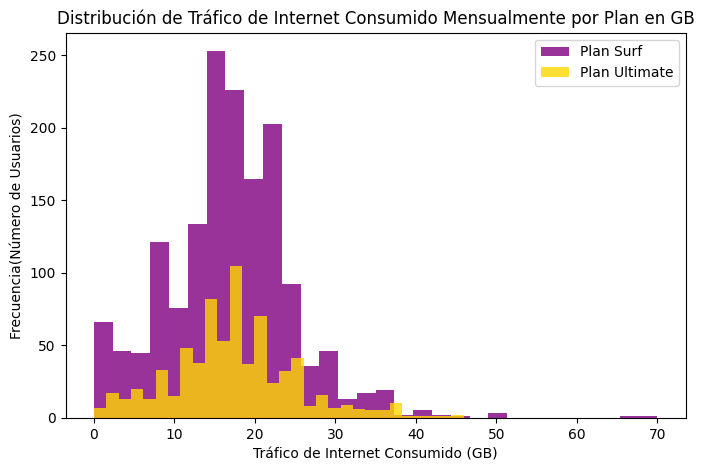

In [61]:
# Compara la cantidad de tráfico de Internet consumido mensualmente por usuarios por plan en GB

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Código del histograma
plt.figure(figsize=[8,5])

plan_surf["rounded_gb_used_per_user_monthly"].plot(kind="hist",
                                                color="purple",                                        
                                                alpha=0.8,
                                                bins=30)

plan_ultimate["rounded_gb_used_per_user_monthly"].plot(kind="hist",
                                                    alpha=0.8,
                                                    color="gold",
                                                    bins=30)
plt.xlabel("Tráfico de Internet Consumido (GB)")
plt.ylabel("Frecuencia(Número de Usuarios)")
plt.title("Distribución de Tráfico de Internet Consumido Mensualmente por Plan en GB")
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.show()


In [62]:
# Calcula la media y la varianza del tráfico de internet consumido mensualmente por plan en GB
# También incluí el cálculo de la desviación estándar y la mediana

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información del tráfico de internet consumido mensualmente por plan en GB
internet_surf = plan_surf["rounded_gb_used_per_user_monthly"]
internet_ultimate = plan_ultimate["rounded_gb_used_per_user_monthly"]

# Obtener los cálculos del promedio de tráfico de internet consumido mensualmente, varianza,  
# desviación estándar y mediana del plan Surf
mean_internet_surf = internet_surf.mean()
var_internet_surf = np.var(internet_surf)
sigma_internet_surf = np.std(internet_surf)
mediam_internet_surf = internet_surf.median()

# Obtener los cálculos del promedio de tráfico de internet consumido mensualmente, varianza,  
# desviación estándar y mediana del plan Ultimate
mean_internet_ultimate = internet_ultimate.mean()
var_internet_ultimate = np.var(internet_ultimate)
sigma_internet_ultimate = np.std(internet_ultimate)
mediam_internet_ultimate = internet_ultimate.median()

# Imprimir los resultados de las medidas estadísticas
print("Plan Surf")
print("La media de tráfico de internet consumido mensualmente del plan surf es:", mean_internet_surf)
print("La varianza de tráfico de internet consumido mensualmente del plan surf es:",var_internet_surf)
print("La desviación estándar de tráfico de internet mensualmente del plan surf es:",sigma_internet_surf)
print("La mediana de tráfico de internet consumido mensualmente del plan surf es:",mediam_internet_surf)
print()
print("Plan Ultimate")
print("La media de tráfico de internet consumido mensualmente del plan ultimate es:",mean_internet_ultimate)
print("La varianza de tráfico de internet consumido mensualmente del plan ultimate es:",var_internet_ultimate)
print("La desviación estándar detráfico de internet consumido mensualmente del plan ultimate es:",sigma_internet_ultimate)
print("La mediana de tráfico de internet consumido mensualmente del plan ultimate es:",mediam_internet_ultimate)


Plan Surf
La media de tráfico de internet consumido mensualmente del plan surf es: 16.670692943420217
La varianza de tráfico de internet consumido mensualmente del plan surf es: 61.54444942447023
La desviación estándar de tráfico de internet mensualmente del plan surf es: 7.845027050588814
La mediana de tráfico de internet consumido mensualmente del plan surf es: 17.0

Plan Ultimate
La media de tráfico de internet consumido mensualmente del plan ultimate es: 17.306944444444444
La varianza de tráfico de internet consumido mensualmente del plan ultimate es: 58.748840663580246
La desviación estándar detráfico de internet consumido mensualmente del plan ultimate es: 7.664779231235578
La mediana de tráfico de internet consumido mensualmente del plan ultimate es: 17.0


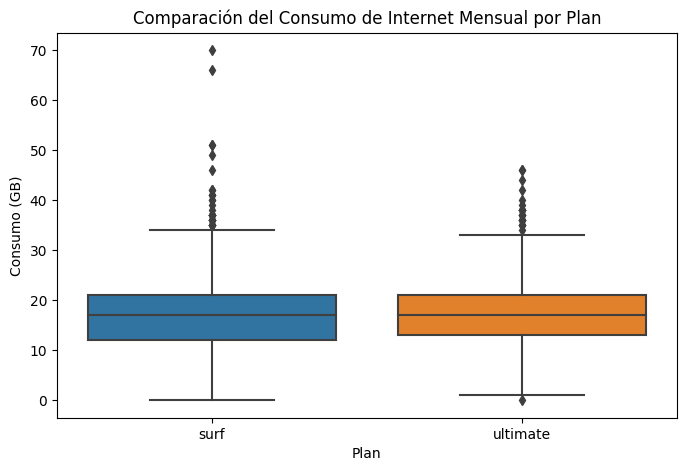

In [63]:
# Traza un diagrama de caja para visualizar la distribución del tráfico de internet consumido en 
# GB mensualmente por plan.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información del tráfico de internet consumido mensualmente por plan en GB
internet_surf = plan_surf["rounded_gb_used_per_user_monthly"]
internet_ultimate = plan_ultimate["rounded_gb_used_per_user_monthly"]

# Datos
data_internet = {
    'Internet': pd.concat([internet_surf, internet_ultimate], ignore_index=True),
    'Plan': ['surf'] * len(internet_surf) + ['ultimate'] * len(internet_ultimate)
}
# Nuevo Dataframe
compared_plan_internet = pd.DataFrame(data_internet)

# Crear Gráfico
plt.figure(figsize=[8,5])
sns.boxplot(x="Plan", y="Internet", data=compared_plan_internet)
plt.title("Comparación del Consumo de Internet Mensual por Plan")
plt.xlabel("Plan")
plt.ylabel("Consumo (GB)")

plt.show()


CONCLUSIONES SOBRE INTERNET CONSUMIDO MENSUALMENTE EN GB

Al visualizar el histograma del tráfico del consumo de internet, observo que hay un patrón similar en ambos planes, de aumento y disminución de la cantidad de usuarios a medida que aumenta el consumo de datos en GB, lo que sugiere un comportamiento de uso similar, pero con un mayor número de usuarios en el plan Surf, quizás debido a una mayor base de clientes. Los mayores consumos de datos por usuarios se registran entre 0 y 25 GB consumidos, con picos de consumos por un mayor número de usuarios en alrededor de 15 GB. Pasando el consumo de 40 GB, se registra una caída a casi cero usuarios. Una explicación a esta situación, puede deberse que en el plan Surf el paquete de datos de la tarifa tiene un tope de 15 GB, mientras que en el plan Ultimate es de 30 GB; por esta razón se cae el uso de los datos, porque implica costes adicionales, rebasando las cantidades fijas de los paquetes. Solo unos cuantos usuarios consumen datos después de los 40 GB, por lo que valdría la pena indagar en sus necesidades de consumo. 

Podemos observar que el promedio de consumo mensual de datos en GB es similar en ambos planes. Los valores de las medianas de ambos planes son similares al promedio, lo que indica que el consumo está centrado en alrededor de los 17 GB. Los valores de las varianzas y las desviaciones estándar son muy similares en ambos planes, con una ligera tendencia a tener más variabilidad en el plan Surf. Entonces podemos concluir, que, basados en la cercanía de los valores de la media y la mediana, no hay diferencias sustanciales en el comportamiento de consumo de datos en ambos grupos. 

Los diagramas de caja y bigotes de cada plan, nos refuerzan lo que se comento en el párrafo anterior, la tendencia central del consumo es similar la valor de la mediana. Similitud en la forma de las cajas, ligeramente más grande en el plan Surf, lo que indica un mayor grado de dispersión de datos comparado al plan Ultimate, y que existen usuarios con mayores variaciones de consumos, mucho mayores y/o menores.  Los valores de los bigotes son casi idénticos, y finalmente, se observan algunos valores atípicos más alejados del bigote superior en el plan Surf, reforzando la idea una mayor dispersión en ese plan.


## Ingreso

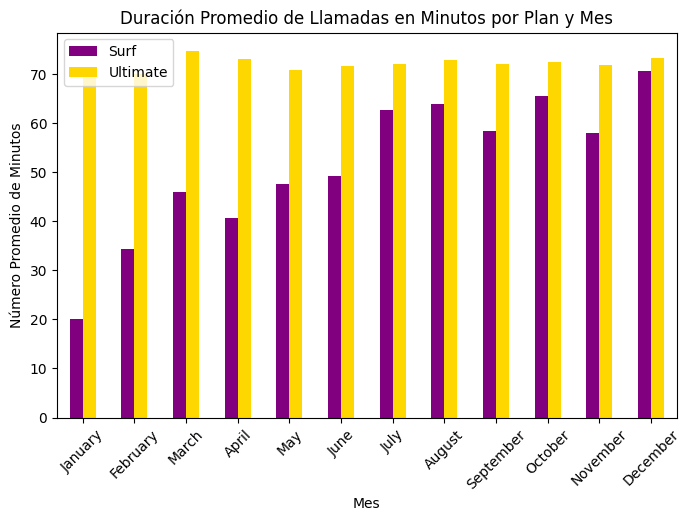

In [64]:
# Compara los ingresos promedio de cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la  información de los ingresos promedios por plan
mean_income_surf = plan_surf.groupby("months")["users_monthly_earnings"].mean() 
mean_income_ultimate = plan_ultimate.groupby("months")["users_monthly_earnings"].mean() 

# Creación de un nuevo Dataframe que une la agrupación del cálculo de los ingresos promedio de cada plan
compared_mean_earnings = pd.DataFrame({
    "Surf" : mean_income_surf,
    "Ultimate" : mean_income_ultimate
})
compared_mean_earnings = compared_mean_earnings.reset_index()
# Reenombrar los datos de los meses de números a nombres.
compared_mean_earnings["months"] = compared_mean_earnings["months"].replace({1 : "January", 
                                                               2 : "February", 
                                                               3 : "March", 
                                                               4 : "April",
                                                               5 : "May",
                                                               6 : "June",
                                                               7 : "July",
                                                               8 : "August",
                                                               9 : "September",
                                                               10 : "October",
                                                               11 : "November",
                                                               12 : "December"})
# Código del gráfico de barras
compared_mean_earnings.plot(kind="bar",
            x="months",
            title="Duración Promedio de Llamadas en Minutos por Plan y Mes",
            xlabel="Mes",
            ylabel="Número Promedio de Minutos",
            color=["purple","gold"],
            rot=45,
            figsize=[8,5])

plt.legend(["Surf", "Ultimate"])
plt.show()

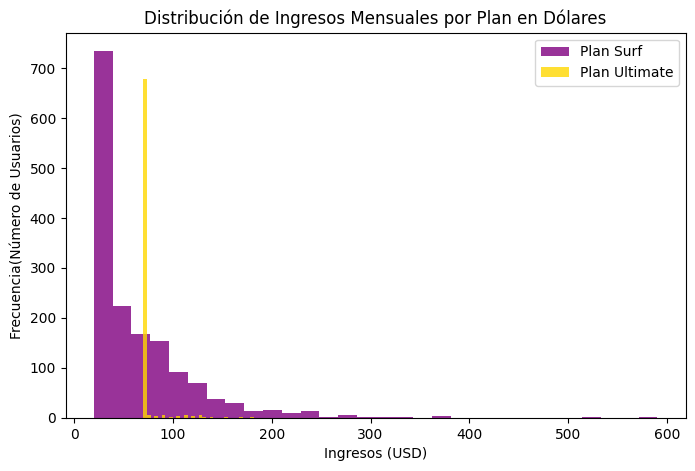

In [65]:
# Compara los ingresos mensuales por plan

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Código del histograma
plt.figure(figsize=[8,5])

plan_surf["users_monthly_earnings"].plot(kind="hist",
                                                color="purple",                                        
                                                alpha=0.8,
                                                bins=30)

plan_ultimate["users_monthly_earnings"].plot(kind="hist",
                                                    alpha=0.8,
                                                    color="gold",
                                                    bins=30)
plt.xlabel("Ingresos (USD)")
plt.ylabel("Frecuencia(Número de Usuarios)")
plt.title("Distribución de Ingresos Mensuales por Plan en Dólares")
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.show()


In [66]:
# Calcula la media y la varianza de los ingresos mensuales por plan
# También incluí el cálculo de la desviación estándar y la mediana

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información de los ingresos mensuales por plan
income_surf = plan_surf["users_monthly_earnings"]
income_ultimate = plan_ultimate["users_monthly_earnings"]

# Obtener los cálculos del promedio de ingresos mensuales, varianza,desviación estándar y mediana    
# del plan Surf
mean_income_surf = income_surf.mean()
var_income_surf = np.var(income_surf)
sigma_income_surf = np.std(income_surf)
mediam_income_surf = income_surf.median()

# Obtener los cálculos del promedio de ingresos mensuales, varianza,desviación estándar y mediana  
# del plan Ultimate
mean_income_ultimate = income_ultimate.mean()
var_income_ultimate = np.var(income_ultimate)
sigma_income_ultimate = np.std(income_ultimate)
mediam_income_ultimate = income_ultimate.median()

# Imprimir los resultados de las medidas estadísticas
print("Plan Surf")
print("La media del ingreso promedio del plan surf es:", mean_income_surf)
print("La varianza del ingreso promedio del plan surf es:",var_income_surf)
print("La desviación estándar del ingreso promedio del plan surf es:",sigma_income_surf)
print("La mediana del ingreso promedio del plan surf es:",mediam_income_surf)
print()
print("Plan Ultimate")
print("La media del ingreso promedio del plan ultimate es:",mean_income_ultimate)
print("La varianza del ingreso promedio del plan ultimate es:",var_income_ultimate)
print("La desviación estándar del ingreso promedio del plan ultimate es:",sigma_income_ultimate)
print("La mediana del ingreso promedio del plan ultimate es:",mediam_income_ultimate)


Plan Surf
La media del ingreso promedio del plan surf es: 60.706408137317226
La varianza del ingreso promedio del plan surf es: 3065.8848438690247
La desviación estándar del ingreso promedio del plan surf es: 55.37043293915106
La mediana del ingreso promedio del plan surf es: 40.36

Plan Ultimate
La media del ingreso promedio del plan ultimate es: 72.31388888888888
La varianza del ingreso promedio del plan ultimate es: 129.66814043209877
La desviación estándar del ingreso promedio del plan ultimate es: 11.387191946748715
La mediana del ingreso promedio del plan ultimate es: 70.0


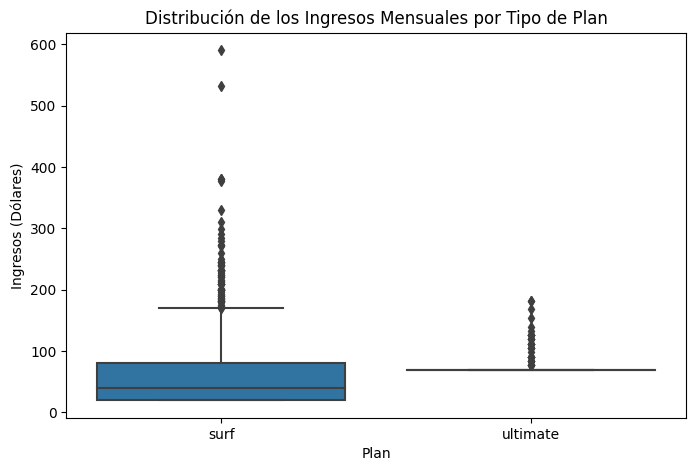

In [67]:
# Traza un diagrama de caja para visualizar los ingresos mensuales por plan

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]

# Extraer la información de los ingresos mensuales por plan
income_surf = plan_surf["users_monthly_earnings"]
income_ultimate = plan_ultimate["users_monthly_earnings"]

# Datos
data_income = {
    'Income': pd.concat([income_surf, income_ultimate], ignore_index=True),
    'Plan': ['surf'] * len(income_surf) + ['ultimate'] * len(income_ultimate)
}
# Nuevo Dataframe
compared_plan_income = pd.DataFrame(data_income)

# Crear Gráfico
plt.figure(figsize=[8,5])
sns.boxplot(x="Plan", y="Income", data=compared_plan_income)
plt.title("Distribución de los Ingresos Mensuales por Tipo de Plan")
plt.xlabel("Plan")
plt.ylabel("Ingresos (Dólares)")

plt.show()


CONCLUSIONES SOBRE LOS INGRESOS MENSUALES

Lo primero que salta a la vista al visualizar el histograma de ingresos es que en el plan Ultimate existe una alta concentración de usuarios en torno al ingreso de 70 dólares, lo que sugiere que muchos usuarios pagan la tarifa mensual de 70 dólares. Los puntos dispersos que se ven a la derecha en torno a ingresos alrededor de 100 dólares, indican usuarios con ingresos mayores, pero en menor cantidad. En el plan Surf se observa una distribución sesgada a la derecha, lo que puede indicar que los ingresos varían más entre los usuarios, con una tendencia central entre 20 y 40 dólares, disminuyendo los ingresos al rebasar los 40 dólares. Desde ese punto, los ingresos se siguen dispersando de manera notoria hasta casi 400 dólares, ya con la existencia de muy pocos usuarios. 

Resulta interesante lo que se desprende del análisis de las medidas estadísticas de los promedios de los ingresos mensuales de los planes, la desviación estándar y de las medianas. La media del plan Surf es mucho mayor que el pago fijo de 20 dólares, lo que indica que hay usuarios con ingresos mayores a ese valor. La mediana alrededor de 40 dólares está también por encima de la tarifa mensual del plan, lo que puede sugerir que muchos usuarios pagan un monto cercanos a esa cifra. La desviación estándar elevada confirma que existe una dispersión considerable de los ingresos, con presencia de valores atípicos extremos como los que se observan en el histograma cercanos a 400 dólares. 

Respecto al plan Ultimate, y al contrario del plan Surf, el promedio y la mediana están muy cercanas al pago de la tarifa mensual de 70 dólares, lo que indica que la mayoría de los usuarios pagan esa cantidad o alguna cantidad cercana a ese umbral. La varianza y la desviación estándar mucho menores en comparación con el plan Surf, reflejan una distribución más concentrada alrededor de la tarifa mensual, sin tantos valores atípicos. 

Todo lo observado anteriormente, se visualiza con claridad en el diagrama de caja y bigotes. Se notan la notable dispersión de los ingresos mensuales en el plan Surf, los valores atípicos marcados, y una caja visiblemente más grande. Para el caso, del plan Ultimate todo se concentra a la mediana de 70 dólares de la tarifa mensual, y lo más interesante, es que no existe una caja, ni bigotes. Solo se notan algunos ingresos alrededor de 100 dólares. 

En conclusión, el plan Ultimate genera ligeramente más ingresos mensuales por usuario (72.31 dólares) que el plan Surf (60.71) dólares. El gráfico de barras ayuda a ratificar la anterior aseveración, ya que se visualizan los ingresos promedio por plan por mes durante el 2018, demostrando que el ingreso promedio del plan Ultimate es mayor que el del plan Surf en todos los meses, pero se concentra alrededor del nivel de 70 dólares de la tarifa mensual del plan en todos los meses, esto implica que en la mayoría de los casos, los usuarios no presentan consumos excedentes.  El plan Surf tiene una mayor dispersión y algunos usuarios con ingresos mucho mayores. 


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

In [68]:
# Hipótesis sobre los ingresos promedios de los planes Ultimate y Surf

print("Hipótesis sobre los ingresos promedios de los planes Ultimate y Surf")
# Hipótesis Nula
print()
print("Hipótesis Nula(H₀): Los ingresos promedio procedentes de los usuarios de los planes de llamada\nUltimate y Surf son iguales.")
print()
# Hipótesis Alternativa
print("Hipótesis Alternativa(H₁): los ingresos promedio procedentes de los usuarios de los planes de\nllamada Ultimate y Surf son diferentes.")
print()
# Prueba Estadística Seleccionada
print("Prueba Seleccionada: Igualdad de las medias de dos poblaciones de dos colas. Se selecciona esta\nprueba estadística ya que el objetivo es determinar si hay alguna diferencia en los promedios de\nlos ingresos de los planes sin especificar si es mayor o menor.")
print()
# Determinar el valor Alfa
print("Valor alpha = 0.05")

Hipótesis sobre los ingresos promedios de los planes Ultimate y Surf

Hipótesis Nula(H₀): Los ingresos promedio procedentes de los usuarios de los planes de llamada
Ultimate y Surf son iguales.

Hipótesis Alternativa(H₁): los ingresos promedio procedentes de los usuarios de los planes de
llamada Ultimate y Surf son diferentes.

Prueba Seleccionada: Igualdad de las medias de dos poblaciones de dos colas. Se selecciona esta
prueba estadística ya que el objetivo es determinar si hay alguna diferencia en los promedios de
los ingresos de los planes sin especificar si es mayor o menor.

Valor alpha = 0.05


FORMULACION DE LAS HIPOTESIS RESPECTO AL PROMEDIO DE LOS INGRESOS DE LOS PLANES SURF Y ULTIMATE

La formulación de mis hipótesis anteriores se basan en que la práctica común, la hipótesis nula plantea una afirmación que se asume verdadera al principio, generalmente, expresa que no hay cambios en lo que se busca comprobar. Por lo tanto, como el planteamiento nos indca comprobar si hay diferencia en los ingresos promedio de los planes Surf y Ultimate. La Hipótesis nula se plantea que no hay diferencias y la hipótesis alternativa que si existen diferencias, ya que es el escenario que queremos comprobar. 

In [69]:
# Prueba las hipótesis

# Filtrar los datos por plan
plan_surf = final_fusion[final_fusion["plan_name"] == "surf"]
plan_ultimate = final_fusion[final_fusion["plan_name"] == "ultimate"]
# Extraer los ingresos por plan
income_surf = plan_surf["users_monthly_earnings"]
income_ultimate = plan_ultimate["users_monthly_earnings"]
# Prueba Estadística
alpha = 0.05
results = st.ttest_ind(income_surf, income_ultimate, equal_var=False)
print("valor p: ", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


valor p:  3.1703905481135734e-15
Rechazamos la hipótesis nula


In [70]:
# Hipótesis sobre los ingresos promedios de usuarios en el área de NY/NJ respecto a otras regiones

print("Hipótesis sobre los ingresos promedios de usuarios en el área de NY/NJ respecto a otras regiones ")
# Hipótesis Nula
print()
print("Hipótesis Nula(H₀): Los ingresos promedio de los usuarios en el área de NY/NJ son iguales respecto al de otras regiones.")
print()
# Hipótesis Alternativa
print("Hipótesis Alternativa(H₁): los ingresos promedio de los usuarios en el área de NY/NJ son\ndiferentes respecto al de otras regiones.")
print()
# Prueba Estadística Seleccionada
print("Prueba Seleccionada: Igualdad de las medias de dos poblaciones de dos colas. Se selecciona esta\nprueba estadística ya que el objetivo es determinar si hay alguna diferencia en los promedios de\nlos ingresos de los planes sin especificar si es mayor o menor.")
print()
# Determinar el valor Alfa
print("Valor alpha = 0.05")

Hipótesis sobre los ingresos promedios de usuarios en el área de NY/NJ respecto a otras regiones 

Hipótesis Nula(H₀): Los ingresos promedio de los usuarios en el área de NY/NJ son iguales respecto al de otras regiones.

Hipótesis Alternativa(H₁): los ingresos promedio de los usuarios en el área de NY/NJ son
diferentes respecto al de otras regiones.

Prueba Seleccionada: Igualdad de las medias de dos poblaciones de dos colas. Se selecciona esta
prueba estadística ya que el objetivo es determinar si hay alguna diferencia en los promedios de
los ingresos de los planes sin especificar si es mayor o menor.

Valor alpha = 0.05


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

FORMULACION DE LAS HIPOTESIS RESPECTO AL PROMEDIO DE LOS INGRESOS DE LOS USUARIOS DE LA REGION DE NUEVA YORK/NUEVA JERSEY EN COMPARACION CON OTRAS REGIONES DEL PAIS.

La formulación de mis hipótesis anteriores se basan en que la práctica común, la hipótesis nula plantea una afirmación que se asume verdadera al principio, generalmente, expresa que no hay cambios en lo que se busca comprobar. Por lo tanto, como el planteamiento nos indca comprobar si hay diferencia en los ingresos promedio de los usuarios del área de Nueva York/Nueva jersey respecto a otras regiones. La Hipótesis nula se plantea que no hay diferencias y la hipótesis alternativa que si existen diferencias, ya que es el escenario que queremos comprobar. 

In [71]:
# Prueba las hipótesis

# Filtrar los datos por regiones
users_ny = final_fusion[final_fusion["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
users_other_cities = final_fusion[final_fusion["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]
# Extraer los ingresos por regiones
income_ny = users_ny["users_monthly_earnings"]
income_others = users_other_cities["users_monthly_earnings"]
#Prueba Estadística
alpha = 0.05
results = st.ttest_ind(income_ny, income_others, equal_var=False)
print("valor p: ", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


valor p:  0.0335256158853001
Rechazamos la hipótesis nula


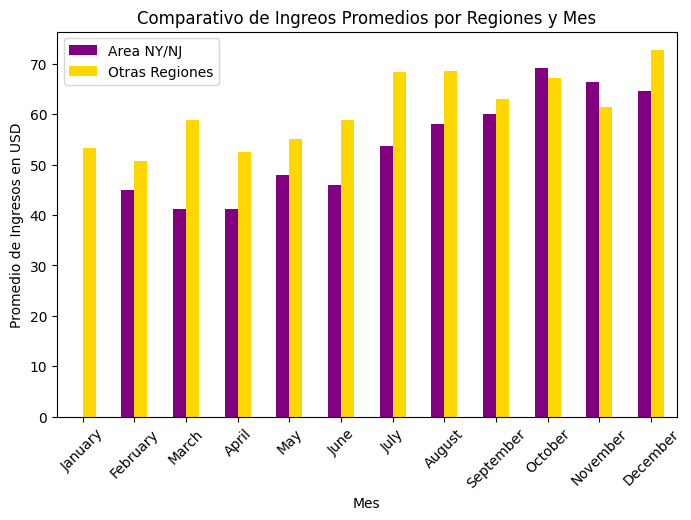

In [73]:
# Compara los ingresos promedio de cada región y por cada mes. Traza un gráfico de barras para visualizarla.

# Filtrar los datos por regiones
users_ny = final_fusion[final_fusion["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
users_other_cities = final_fusion[final_fusion["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]

# Extraer la  información de los ingresos promedios por región
mean_income_ny = users_ny.groupby("months")["users_monthly_earnings"].mean()
mean_income_others = users_other_cities.groupby("months")["users_monthly_earnings"].mean()

# Creación de un nuevo Dataframe que une la agrupación del cálculo de los ingresos promedio de cada región
compared_mean_regions = pd.DataFrame({
    "ny/nj" : mean_income_ny,
    "other_regions" : mean_income_others
})
compared_mean_regions = compared_mean_regions.reset_index()
# Reenombrar los datos de los meses de números a nombres.
compared_mean_regions["months"] = compared_mean_regions["months"].replace({1 : "January",
                                                               2 : "February",
                                                               3 : "March",
                                                               4 : "April",
                                                               5 : "May",
                                                               6 : "June",
                                                               7 : "July",
                                                               8 : "August",
                                                               9 : "September",
                                                               10 : "October",
                                                               11 : "November",
                                                               12 : "December"})
# Código del gráfico de barras
compared_mean_regions.plot(kind="bar",
            x="months",
            title="Comparativo de Ingreos Promedios por Regiones y Mes",
            xlabel="Mes",
            ylabel="Promedio de Ingresos en USD",
            color=["purple","gold"],
            rot=45,
            figsize=[8,5])

plt.legend(["Area NY/NJ", "Otras Regiones"])
plt.show()

In [72]:
# Calcula la media y la varianza de los ingresos por regiones NY/NJ, y las otras regiones.
# También incluí el cálculo de la desviación estándar y la mediana

# Filtrar los datos por regiones
users_ny = final_fusion[final_fusion["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
users_other_cities = final_fusion[final_fusion["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]

# Extraer los ingresos por regiones
income_ny = users_ny["users_monthly_earnings"]
income_others = users_other_cities["users_monthly_earnings"]

# Obtener los cálculos del promedio de ingresos mensuales, varianza, desviación estándar y mediana  
# del área NY/NJ
mean_income_ny = income_ny.mean()
var_income_ny = np.var(income_ny)
sigma_income_ny = np.std(income_ny)
mediam_income_ny = income_ny.median()

# Obtener los cálculos del promedio de ingresos mensuales, varianza, desviación estándar y mediana  
# de las otras áreas
mean_income_others = income_others.mean()
var_income_others = np.var(income_others)
sigma_income_others = np.std(income_others)
mediam_income_others = income_others.median()

# Imprimir los resultados de las medidas estadísticas
print("Area NY/NJ")
print("La media del ingreso promedio de la región NY/NJ es:", mean_income_ny)
print("La varianza del ingreso promedio de la región NY/NJ es:",var_income_ny)
print("La desviación estándar del ingreso promedio de la región NY/NJ es:",sigma_income_ny)
print("La mediana del ingreso promedio de la región NY/NJ es:",mediam_income_ny)
print()
print("Otras Regiones")
print("La media del ingreso promedio de otras regiones es:",mean_income_others)
print("La varianza del ingreso promedio de otras regiones es:",var_income_others)
print("La desviación estándar del ingreso promedio de otras regiones es:",sigma_income_others)
print("La mediana del ingreso del promedio de otras regiones es:",mediam_income_others)


Area NY/NJ
La media del ingreso promedio de la región NY/NJ es: 59.921352785145885
La varianza del ingreso promedio de la región NY/NJ es: 1890.5177172681156
La desviación estándar del ingreso promedio de la región NY/NJ es: 43.4800841451361
La mediana del ingreso promedio de la región NY/NJ es: 51.769999999999996

Otras Regiones
La media del ingreso promedio de otras regiones es: 65.2227713987474
La varianza del ingreso promedio de otras regiones es: 2223.8866958162175
La desviación estándar del ingreso promedio de otras regiones es: 47.15810318297607
La mediana del ingreso del promedio de otras regiones es: 70.0


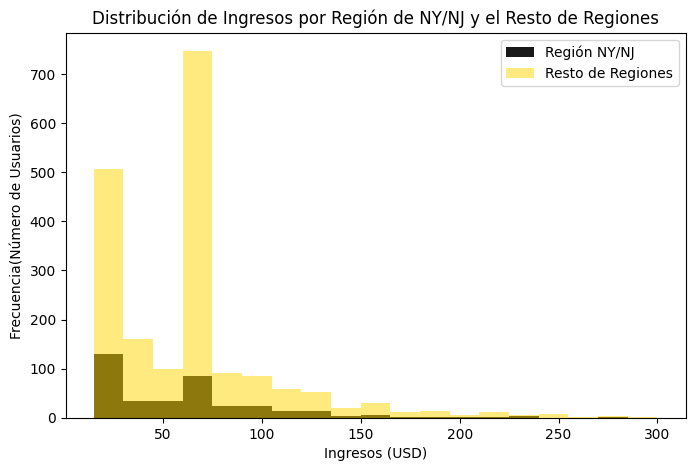

In [74]:
# Compara los ingresos por la región de NY/NJ y las otras regiones
users_ny = final_fusion[final_fusion["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
users_other_cities = final_fusion[final_fusion["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]

# Código del histograma
plt.figure(figsize=[8,5])

users_ny["users_monthly_earnings"].plot(kind="hist",
                                                color="black",
                                                alpha=0.9,
                                                bins=[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300])
users_other_cities["users_monthly_earnings"].plot(kind="hist",
                                                    alpha=0.5,
                                                    color="gold",
                                                    bins=[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300])
plt.xlabel("Ingresos (USD)")
plt.ylabel("Frecuencia(Número de Usuarios)")
plt.title("Distribución de Ingresos por Región de NY/NJ y el Resto de Regiones")
plt.legend(["Región NY/NJ", "Resto de Regiones"])
plt.show()

## Conclusión general





Al realizar las pruebas estadísticas de las hipótesis planteadas, podemos decir que, en el caso de la primera hipótesis, al ser el valor p mucho menor que 0.05, tenemos suficiente evidencia estadística para rechazar la hipótesis nula y concluir que los ingresos promedio por usuario difieren significativamente entre los dos planes. 

La diferencia de medias no es producto del azar, esto es, que el promedio de ingresos del plan Ultimate (72.31 USD) es mayor que la del plan Surf (60.71). Entonces, en base a esa diferencia, podemos concluir que los usuarios del plan Ultimate generan en promedio más ingresos que los usuarios del plan Surf. La diferencia significativa en ingresos promedio sugiere que el plan Ultimate puede ser más rentable para Megaline. Sin embargo, se debe tener cuidado en evaluar otros factores, como el número de clientes en cada plan, o si esta tendencia se mantiene con usuarios en ciertas regiones.

Respecto a la segunda hipótesis, que plantea si existen diferencias entre el área de Nueva York/Nueva Jersey (NY/NJ) respecto al resto de regiones (p=.0335). Los resultados muestran que hay una diferencia estadísticamente significativa en los ingresos promedio entre los usuarios del área de NY/NJ (59.92) y los de las otras regiones (65.22), por lo que se rechaza la hipótesis nula. 

El valor de la mediana es menor en el área de NY/NJ (alrededor de 51 dólares), respecto a la mediana a la de otras regiones que es alrededor de 70 dólares, lo que indicaría que la mayoría de los ingresos en NY/NJ tienden a ser más bajos que otras regiones, reflejando variaciones socioeconómicas o demográficas entre las regiones, lo que puede tener un impacto relevante en la toma de decisiones comerciales regionales para Megaline. Adicionalmente, se puede asumir, que las otras regiones tienden a comsumir el plan Ultimate, debido a que el valor de la mediana es cercano a 70 dólares, esta situación se puede observar claramente en los gráficos de barras, donde las barras mensuales  tienden a acercarse al valor de 70 dólares de ingreso promedio, y en el histograma, se visualiza como se concentran la mayor parte de los usuarios en el intervalo cercano a 70 dólares.

En conclusión, podemos determinar que el plan Ultimate es el que genera más ingresos, y que otras regiones del país que no sean la de NY/NJ pueden representar mejores oportunidades de negocio para Megaline. Yo recomendaría a la empresa que revisará que tipo de estrategias comerciales y planes de mercadotecnia/publicidad están llevando a cabo en la región de NY/NJ, ya que es demostrado ser una de las áreas con mayores ingreso per cápita en el país, y resulta contradictorio con los resultados obtenidos del análisis, relacionados a los datos asociados a los promedios de ingresos de las regiones.

Estos hallazgos resaltan la importancia de que Megaline considere estos patrones y diferencias en sus estrategias comerciales y de marketing. Por ejemplo, la mayor dispersión en los ingresos y el comportamiento de uso en ciertas regiones sugieren que podrían beneficiarse de campañas segmentadas y ofertas personalizadas para maximizar la rentabilidad. Además, la tendencia de menor uso de ciertos servicios, como los mensajes, indica oportunidades para incentivar su uso o promover paquetes que los incluyan.
